In [1]:
# This notebook gathers metadata for the MERFISH dataset. 
# In particular we want to get (x,y,z) co-ordinates, and celltype annotations for the MERFISH and Zhuang datasets. 
import anndata as ad
import pandas as pd
import numpy as np
import toml

In [2]:
paths = toml.load('/allen/programs/celltypes/workgroups/mousecelltypes/Rohan/code/abcex/config.toml')
expr_data = ad.read_h5ad(paths['data']+'expression_matrices/MERFISH-C57BL6J-638850/20230830/C57BL6J-638850-log2.h5ad', backed='r')

In [3]:
genes_anno = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/gene.csv')
cells_anno_1 = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/cell_metadata.csv')
cells_anno_2 = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/views/cell_metadata_with_cluster_annotation.csv')
cells_anno_3 = pd.read_csv(paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/views/ccf_coords.csv')
# ccf_coords.csv was generated using 01_merfish_ccf_registration_tutorial.ipynb adapted from abc_atlas_access/notebooks.

In [4]:
paths['data']+'metadata/MERFISH-C57BL6J-638850/20230830/views/ccf_coords.csv'

'/allen/programs/celltypes/workgroups/mousecelltypes/Rohan/dat/raw/abc_atlas/metadata/MERFISH-C57BL6J-638850/20230830/views/ccf_coords.csv'

In [5]:
print(genes_anno.columns)
print(cells_anno_1.columns)
print(cells_anno_2.columns)
print(cells_anno_3.columns)

Index(['gene_identifier', 'gene_symbol', 'transcript_identifier', 'name',
       'mapped_ncbi_identifier'],
      dtype='object')
Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x', 'y', 'z'],
      dtype='object')
Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'neurotransmitter',
       'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color',
       'class_color', 'subclass_color', 'supertype_color', 'cluster_color'],
      dtype='object')
Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x_section', 'y_section', 'z_section',
       'neurotransmitter', 'class', 'subclass', 'supertype'

In [6]:
expr_data_ = expr_data[cells_anno_3['cell_label'],:]

In [7]:
print(expr_data.shape)
print(cells_anno_1.shape)
print(cells_anno_2.shape)
print('---')
print(expr_data_.shape)
print(cells_anno_3.shape)

(4334174, 550)
(3938808, 11)
(3938808, 21)
---
(3739961, 550)
(3739961, 38)


In [8]:
assert np.all(cells_anno_1['cell_label']==cells_anno_2['cell_label'])
assert np.all(expr_data_.obs.index==cells_anno_3['cell_label'])

In [9]:
cells_anno_3['parcellation_index']

0          1160
1           564
2           761
3           718
4           761
           ... 
3739956     828
3739957    1004
3739958    1091
3739959     863
3739960    1086
Name: parcellation_index, Length: 3739961, dtype: int64

In [10]:
display(cells_anno_3['parcellation_division'].value_counts().to_frame())
display(cells_anno_3['parcellation_organ'].value_counts().to_frame())

,count
parcellation_division,
Isocortex,935742
STR,401346
CB,383127
HPF,304642
MB,281852
OLF,274354
MY,147562
P,136569
TH,133805


,count
parcellation_organ,
brain,3671375
unassigned,68586


In [11]:
display(cells_anno_3['parcellation_structure'].value_counts().to_frame())

,count
parcellation_structure,
CP,234174
MOs,90859
MOp,83976
PIR,77916
MOB,77675
...,...
ISN,45
ACVII,36
IV,36


In [12]:
parc = ['parcellation_organ', 'parcellation_category',
       'parcellation_division', 'parcellation_structure',
       'parcellation_substructure']

df = cells_anno_3[parc].drop_duplicates()

In [13]:
display(df)

,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
0,brain,grey,HPF,DG,DG-po
1,brain,grey,P,TRN,TRN
2,brain,grey,P,P-unassigned,P-unassigned
3,brain,fiber tracts,cbf,arb,arb
7,brain,grey,P,PG,PG
...,...,...,...,...,...
743025,brain,grey,MB,IV,IV
910693,brain,grey,MB,IPN,IPN-unassigned
932528,brain,fiber tracts,cm,Xn,ts
958180,brain,grey,Isocortex,FRP,FRP6b


In [14]:
df.loc[(df['parcellation_category'] == 'grey') & \
        (df['parcellation_division']=='Isocortex')]

,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
746,brain,grey,Isocortex,ORBm,ORBm1
1453,brain,grey,Isocortex,SSp-ll,SSp-ll6a
1527,brain,grey,Isocortex,SSp-ll,SSp-ll6b
1528,brain,grey,Isocortex,AUDp,AUDp5
1905,brain,grey,Isocortex,VISC,VISC1
...,...,...,...,...,...
476665,brain,grey,Isocortex,AUDpo,AUDpo6b
479300,brain,grey,Isocortex,VISpl,VISpl6b
615997,brain,grey,Isocortex,VISli,VISli6b
958180,brain,grey,Isocortex,FRP,FRP6b


In [15]:
# Filtering cells based on assigned area and cell type
meta = cells_anno_3.loc[(cells_anno_3['parcellation_category'] == 'grey') & \
        (cells_anno_3['parcellation_division']=='Isocortex')]

kept_classes = list(set(meta['class'].unique()) - set(['34 Immune', '33 Vascular', '32 OEC', '31 OPC-Oligo','30 Astro-Epen']))
meta = meta.loc[meta['class'].isin(kept_classes)]
print(meta.shape)

(657501, 38)


In [16]:
expr_data_ = expr_data[meta['cell_label'],:]
print(expr_data_.shape)

(657501, 550)


In [17]:
display(meta['parcellation_structure'].value_counts().to_frame())

,count
parcellation_structure,
MOs,59734
MOp,56672
VISp,47988
SSs,46586
SSp-bfd,40253
SSp-m,39592
RSPv,26966
SSp-ul,21230
ACAv,20320


In [18]:
z = meta['z_section'].unique()
z = np.sort(z)
print(np.diff(z))

[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.4 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.2 0.4
 0.2 0.2 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.2 0.4 0.2 0.4 0.2 0.2 0.2 0.4 0.2
 0.2]


In [19]:
meta = meta.loc[(meta['z_section']==3.6) & (meta['brain_section_label']=='C57BL6J-638850.19')]
expr_data_ = expr_data[meta['cell_label'],:]

In [20]:
from scipy.spatial import KDTree
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

kdt = KDTree(meta[['x_section','y_section','z_section']], leafsize=20)

,cell_label,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
2305306,1018093344102140287-3,C57BL6J-638850.19,168,0.762807,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.936084,3.606435,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
3189308,1018093344102140278-3,C57BL6J-638850.19,600,0.612759,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.946803,3.599740,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2710384,1018093344102140296-3,C57BL6J-638850.19,198,0.762351,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.927146,3.618229,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2549557,1018093344102140268-3,C57BL6J-638850.19,167,0.684974,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.950971,3.620022,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2373685,1018093344102140307-1,C57BL6J-638850.19,80,0.784162,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.914237,3.618014,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2433144,1018093344102140280-4,C57BL6J-638850.19,164,0.737287,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.938465,3.632285,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2546395,1018093344102140271-3,C57BL6J-638850.19,166,0.717851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.955371,3.587955,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2311298,1018093344102140252-4,C57BL6J-638850.19,170,0.754026,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.971368,3.590122,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2302188,1018093344102140257-4,C57BL6J-638850.19,167,0.733598,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.953741,3.645658,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2546514,1018093344102140317-3,C57BL6J-638850.19,166,0.769219,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.912995,3.568749,...,brain,grey,Isocortex,VISpl,VISpl2/3,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C


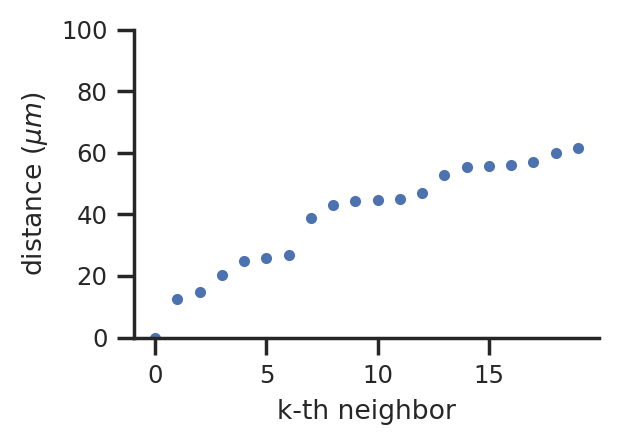

In [21]:
dist_mm, ind = kdt.query(meta[['x_section','y_section','z_section']].iloc[1000], k=20)
dist_um = dist_mm * 1e3
display(meta.iloc[ind])

f, ax = plt.subplots(1,1,figsize = (3,2))
ax.plot(dist_um,'.')
ax.set(xlabel = 'k-th neighbor', ylabel=r'distance ($\mu m$)', ylim = (0, 100))
plt.show()

In [22]:
meta.reset_index(drop=True, inplace=True)
display(meta.head(3))

,cell_label,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
0,1018093344102460798,C57BL6J-638850.19,2762,0.586802,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.504006,4.377100,...,brain,grey,Isocortex,VISpor,VISpor1,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
1,1018093344102460659-1,C57BL6J-638850.19,2762,0.552198,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.642427,4.261765,...,brain,grey,Isocortex,VISpor,VISpor1,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C
2,1018093344102610113-1,C57BL6J-638850.19,5158,0.659569,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.438886,4.405161,...,brain,grey,Isocortex,VISpor,VISpor1,#FFFFFF,#BFDAE3,#70FF71,#08858C,#08858C


In [23]:
#adata = expr_data_.to_memory()
#adata.obs = meta
#adata.write_h5ad('test_spacetx_gnn.h5ad')